In [21]:
from conf import Users, Figures, Actions, Surface, Fixations, Steps, GazePoints
from table_loader import _GET, _LOAD, _TOLIST, _GET_ALL, _EXISTS, _GET_ALL_VALUES
import matplotlib.pyplot as plt
import constants as cst
from utils import _sum, centroid, distance, distance_min_block_corner
import sys

users = Users()
figures = Figures()
actions = Actions()
surfaces = Surface()
steps = Steps()

def stacked_barchart(to_plot, label, ax, bottom = []):
    x = []
    y = []
    for item in to_plot:
        x.append(item[0])
        y.append(item[1])

    if (len(bottom) <= 0):
        ax.bar(x,y,label=label)
        bottom = []
        for item in y:
            bottom.append(item)
    else:
        ax.bar(x,y,bottom=bottom,label=label)
        for i in range(len(y)):
            bottom[i] += y[i]
    return bottom

DISPLAY = {
    0:"Screen",\
    1:"Table",\
    -1:"No_Display"
}

_PLOT_TIME 232968


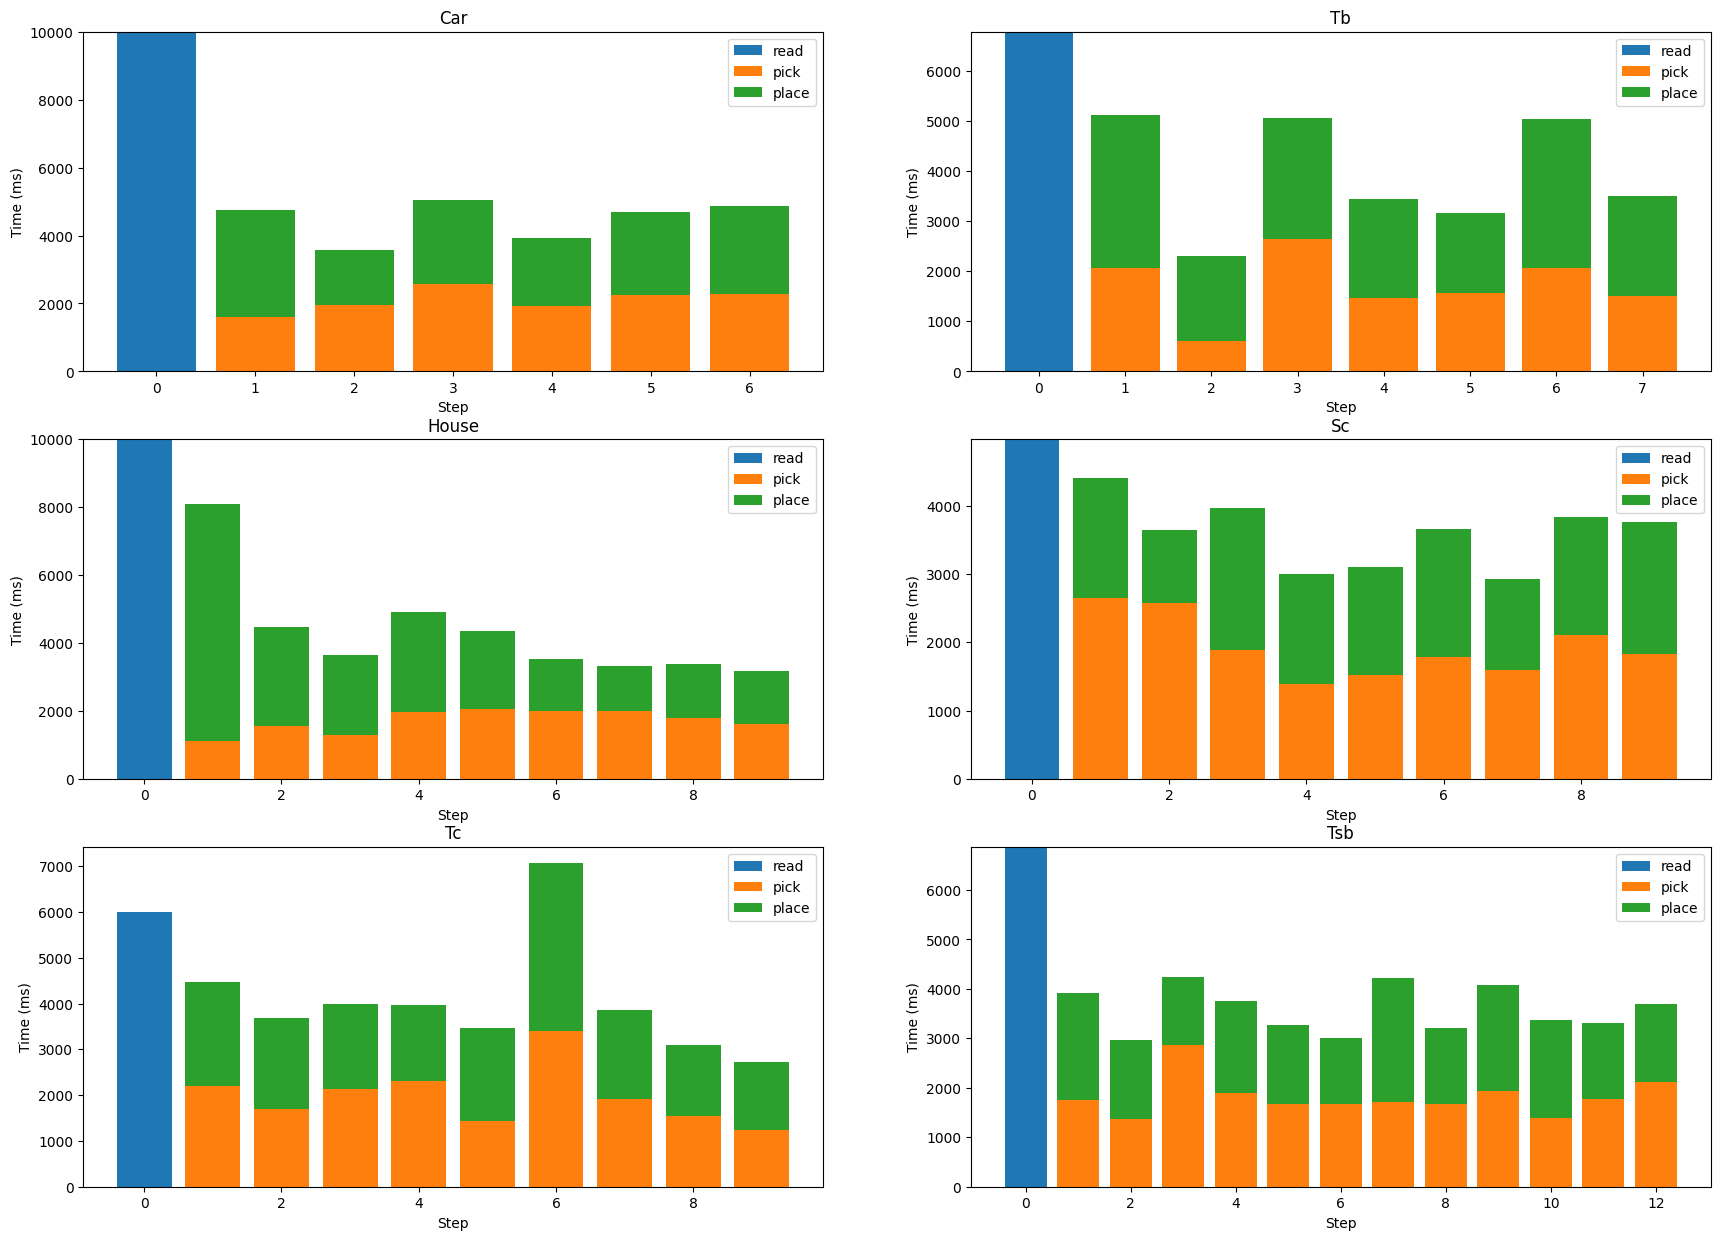

In [27]:
def _PLOT_TIME(id):
    print("_PLOT_TIME %d" % id)

    fig, axs = plt.subplots(3, 2, figsize=(21, 15))
    coord = [[0,0], [0,1], [1,0], [1,1], [2,0], [2,1]]
    for figId in figures.get_figures_id_list():
        width = 0.3  # the width of the bars
        offset = -width*2
        csvfile = ("../data/%d_%s_actions.csv" % (id, figures.get_figure_name(figId)))
        table = _LOAD(csvfile)
        ax = axs[coord[figId][0], coord[figId][1]]
        ax.set_title(figures.get_figure_name(figId).capitalize())
        ax.set_xlabel('Step')
        ax.set_ylabel('Time (ms)')
        bottom = []
        for act in actions.get_actions_id_list():
            to_plot = []
            offset += width
            for step in range(0, figures.get_figure_n_steps(figId)+1):
                if _EXISTS(_GET_ALL(table, act, keyId="actionId"), step, "duration", keyId="stepId"):
                    to_plot.append([
                        step, \
                        _sum(_GET_ALL_VALUES(_GET_ALL(table, act, keyId="actionId"), step, "duration", keyId="stepId"))])
                else:
                    to_plot.append([step, 0])
            bottom = stacked_barchart(to_plot, actions.get_action_name(act),ax, bottom)
        ax.legend()
    fig.savefig("%d_PLOT_TIME.png" % id)
    
_PLOT_TIME(232968)

_PLOT_DISPLAY_TIME 232968


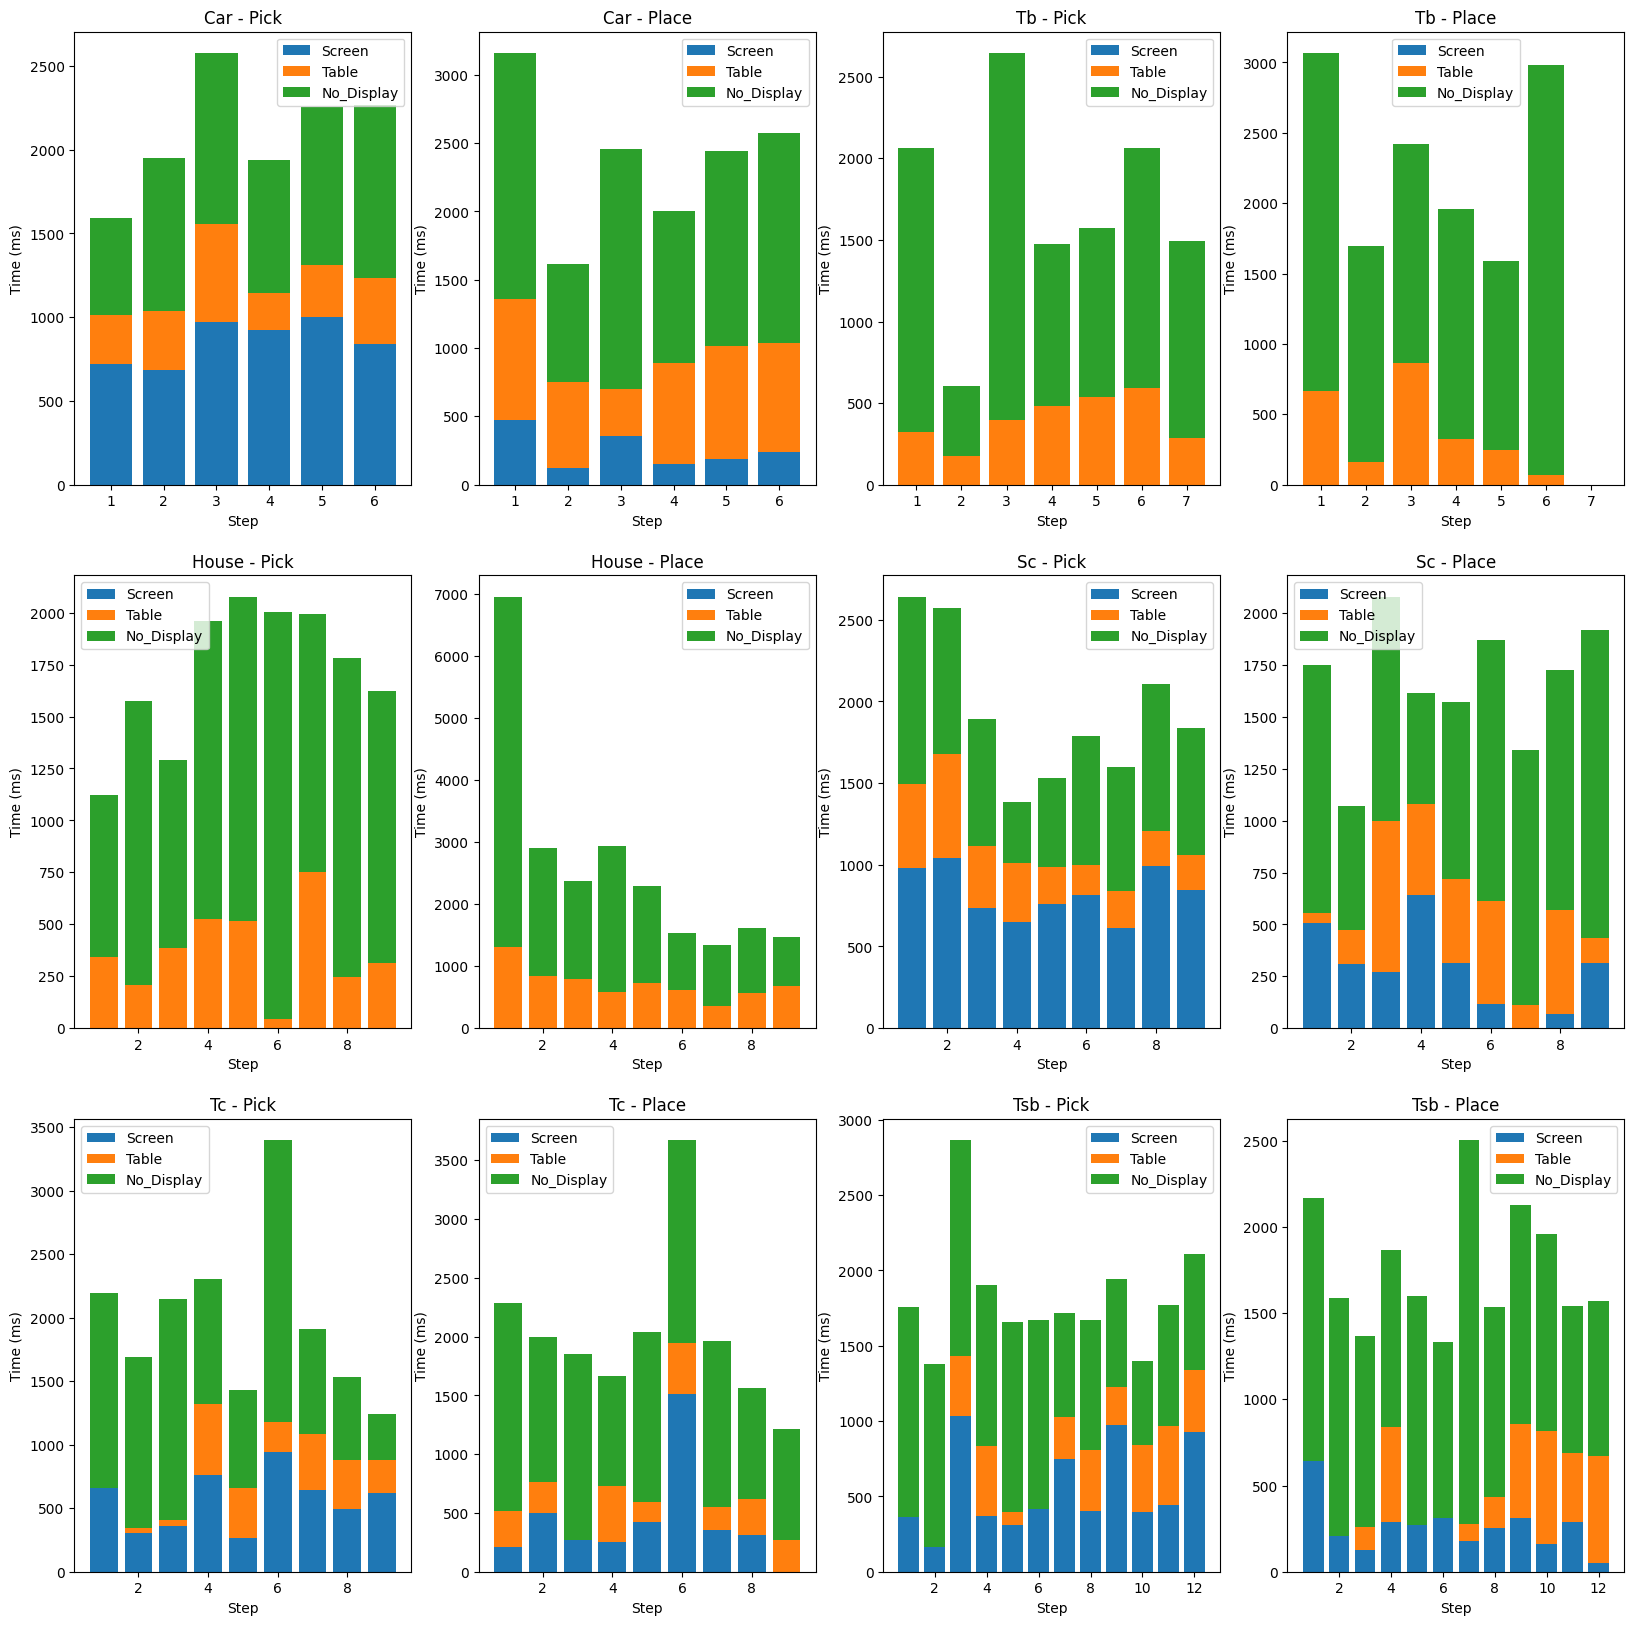

In [38]:
def _PLOT_DISPLAY_TIME(id):
    print("_PLOT_DISPLAY_TIME %d" % id)

    fig, axs = plt.subplots(3, 4, figsize=(20, 20))
    coord = [{0:[0,0], 1:[0,1]},\
            {0:[0,2], 1:[0,3]},\
            {0:[1,0], 1:[1,1]},\
            {0:[1,2], 1:[1,3]},\
            {0:[2,0], 1:[2,1]},\
            {0:[2,2], 1:[2,3]}]
    for figId in figures.get_figures_id_list():
        csvfile = ("../data/%d_%s_displays.csv" % (id, figures.get_figure_name(figId)))
        table = _LOAD(csvfile)

        width = 0.3  # the width of the bars
        offset = -width*2
        for act in actions.get_actions_id_list():
            if(act == 0):
                continue
            ax = axs[coord[figId][act-1][0], coord[figId][act-1][1]]
            f_name = figures.get_figure_name(figId).capitalize()
            a_name = actions.get_action_name(act).capitalize()
            ax.set_title("%s - %s" % (f_name, a_name))
            ax.set_xlabel('Step')
            ax.set_ylabel('Time (ms)')
            offset += width
            bottom = []
            for disp in DISPLAY.keys():
                to_plot = []
                for step in range(1, figures.get_figure_n_steps(figId)+1):
                    tmp = _GET_ALL(table, act, keyId="actionId")
                    tmp = _GET_ALL(tmp, step, keyId="stepId")
                    d = _sum(_GET_ALL_VALUES(tmp, disp, "duration", keyId="display"))
                    to_plot.append([step, d])
                bottom = stacked_barchart(to_plot, DISPLAY[disp],ax, bottom)
            ax.legend()
    fig.savefig("%d_PLOT_DISPLAY_TIME.png" % id)
    
_PLOT_DISPLAY_TIME(232968)